# Simple Linear Regression

## Dataset

In [2]:
%cat "../00_data/Salary_Data.csv" | head

YearsExperience,Salary
1.1,39343.00
1.3,46205.00
1.5,37731.00
2.0,43525.00
2.2,39891.00
2.9,56642.00
3.0,60150.00
3.2,54445.00
3.2,64445.00


# Data Preprocessing

In [3]:
# importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Importing the Data

In [4]:
# importing the data
dataset = pd.read_csv("../00_data/Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.size

60

### Missing Data

In [11]:
print(np.sum(dataset.isna(), axis=0))

YearsExperience    0
Salary             0
dtype: int64


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


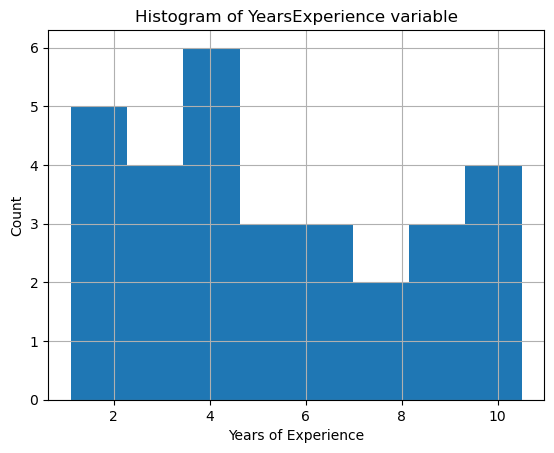

In [13]:
dataset['YearsExperience'].hist(bins=8)
plt.title('Histogram of YearsExperience variable')
plt.xlabel('Years of Experience')
plt.ylabel('Count');

Text(0, 0.5, 'Count')

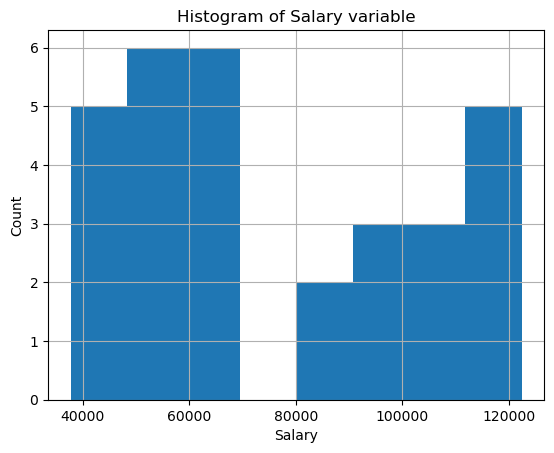

In [14]:
dataset['Salary'].hist(bins=8)
plt.title('Histogram of Salary variable')
plt.xlabel('Salary')
plt.ylabel('Count')

## Split features and target

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Split into training and test set

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Fitting the model

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

## Predicting a new result

In [20]:
y_pred = regressor.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

## Metrics

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSSE = {mean_squared_error(y_test, y_pred)}')

MSSE = 12823412.298126549


In [23]:
print(f'R^2 = {round(r2_score(y_test, y_pred) * 100, 0)}')

R^2 = 99.0


## Data Viz

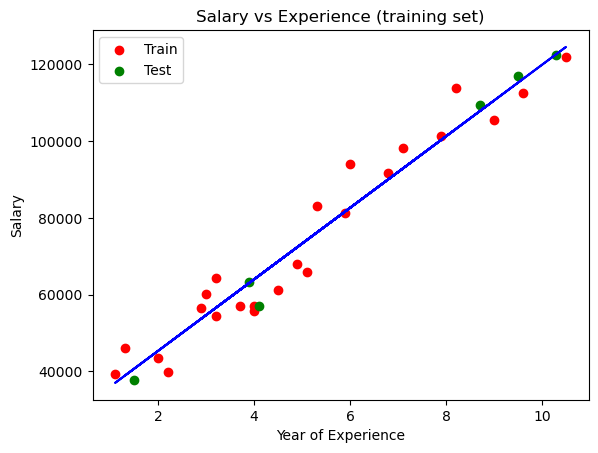

In [27]:
# data viz
plt.scatter(X_train, y_train, color = 'red', label='Train')
plt.scatter(X_test, y_test, color = 'green', label='Test')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()